In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
sns.set() # to set the style

/Users/Noura/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
connection = sqlite3.connect('mpg.db') # miles per gallons
query = 'SELECT * FROM mpg'
df = pd.read_sql(query, connection)
df.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
query2 = 'SELECT * FROM mpg where mpg = 18.0'
df2 = pd.read_sql(query2, connection)
df2.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
2,16,18.0,6,199.0,97.0,2774,15.5,70,usa,amc hornet
3,37,18.0,6,232.0,100.0,3288,15.5,71,usa,amc matador
4,45,18.0,6,258.0,110.0,2962,13.5,71,usa,amc hornet sportabout (sw)


In [4]:
df.info() # horsepower 392 has a null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         398 non-null    int64  
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
 9   name          398 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [5]:
df.shape #(rows, columns)

(398, 10)

In [6]:
# describe numerical columns
df.describe()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,198.500000,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,115.036951,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,0.000000,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,99.250000,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,198.500000,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,297.750000,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,397.000000,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
# describe categorical columns
df.describe(exclude="number")

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


In [8]:
# How many missing values
df.isnull().sum()

index           0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

# Histogram

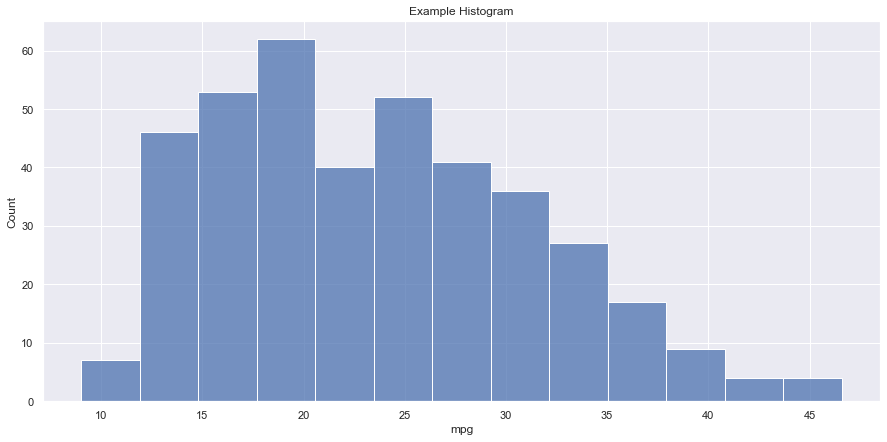

In [9]:
# Histogram 
plt.figure(figsize=(15,7))
sns.histplot(df["mpg"]) 
plt.title("Example Histogram");

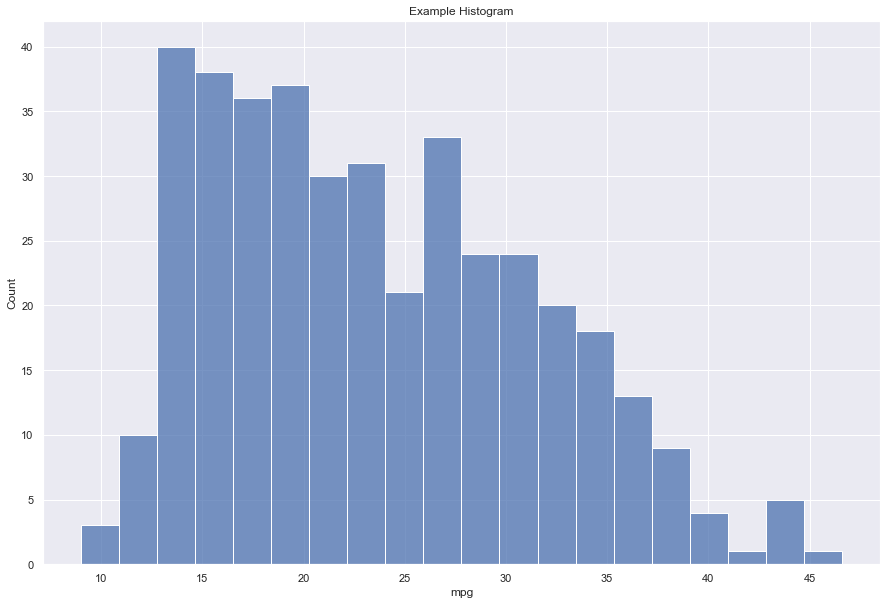

In [10]:
# Histogram
plt.figure(figsize=(15,10))
sns.histplot(df["mpg"], bins=20) 
plt.title("Example Histogram");

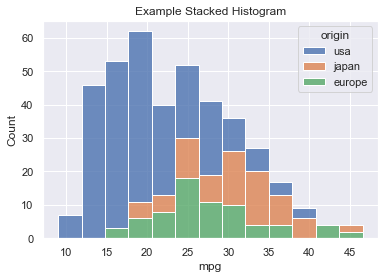

In [11]:
# Stacked Histogram separated by origin
sns.histplot(
    df,
    x="mpg",
    hue="origin", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)
plt.title("Example Stacked Histogram");

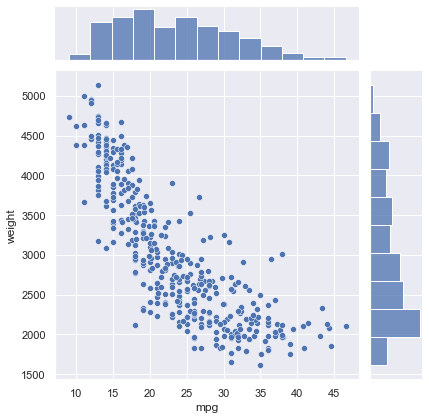

In [12]:
sns.jointplot(x='mpg', y='weight',data=df, kind='scatter'); # kind can be'hex' or 'reg'

# Pairplots

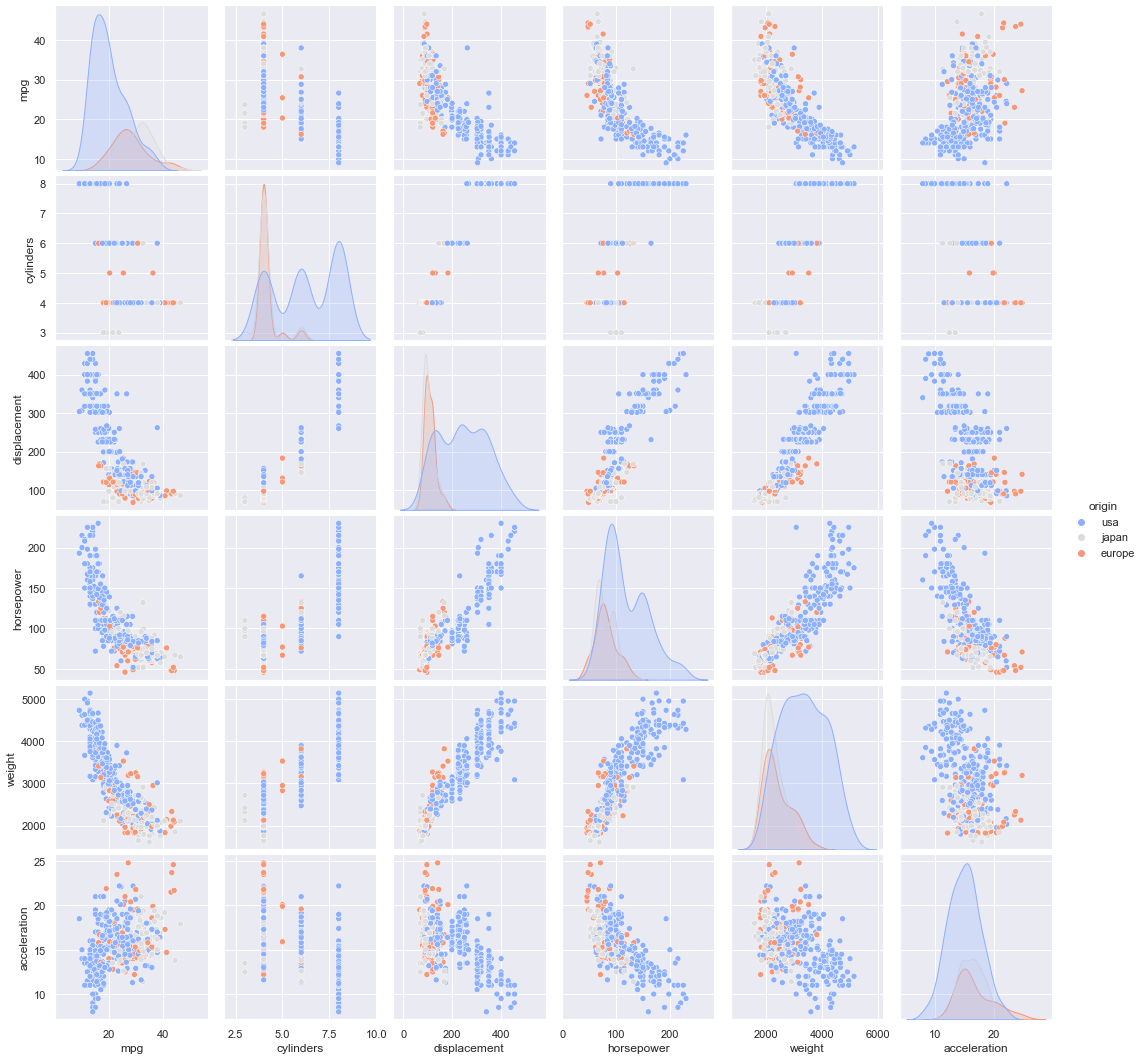

In [13]:
# Remove unwanted columns
df_pair = df.drop(["index", "model_year"], axis=1)
sns.pairplot(df_pair, hue="origin", palette='coolwarm'); #for numerical values, we use hue for catagorical

# KDE Plots - kernel density estimate (KDE)

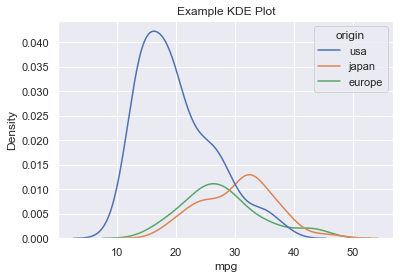

In [14]:
sns.kdeplot(
    data=df, 
    x="mpg",
    hue="origin")

plt.title("Example KDE Plot");

# Barplot

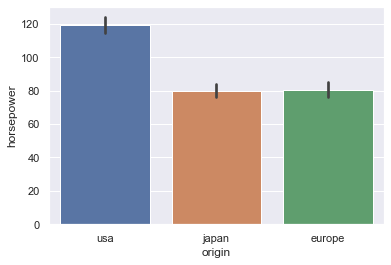

In [15]:
sns.barplot(x='origin', y='horsepower',data=df); # it shows the average 

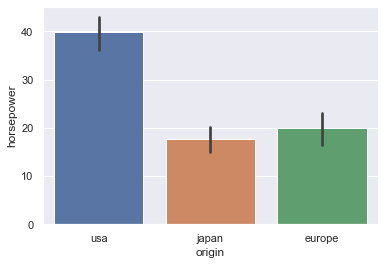

In [16]:
import numpy as np
sns.barplot(x='origin', y='horsepower',data=df, estimator=np.std);

# Countplot

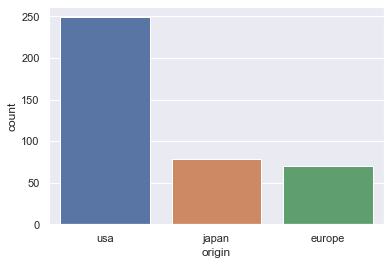

In [17]:
sns.countplot(x='origin', data=df); # it shows the count 

# Grouped Bar Chart

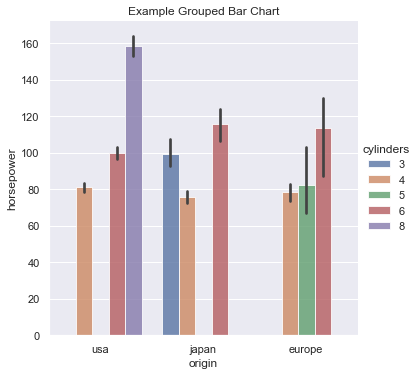

In [18]:
g = sns.catplot(
    data=df, # Data
    kind="bar", # Chart to use
    x="origin", # X axis
    y="horsepower", # y axis
    hue="cylinders", # create bar for each hue
    alpha=.8, # adjust transparancy
    height=5
)
plt.title("Example Grouped Bar Chart");

# Boxplot

/Users/Noura/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


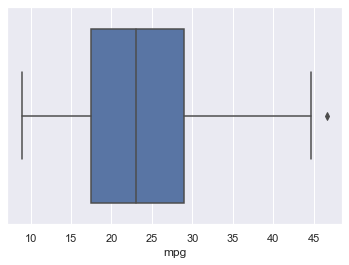

In [19]:
sns.boxplot(df["mpg"]);

In [20]:
df["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

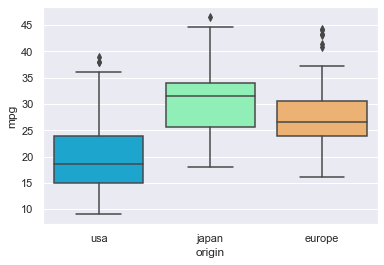

In [21]:
sns.boxplot(x="origin", y="mpg", data=df, palette='rainbow');

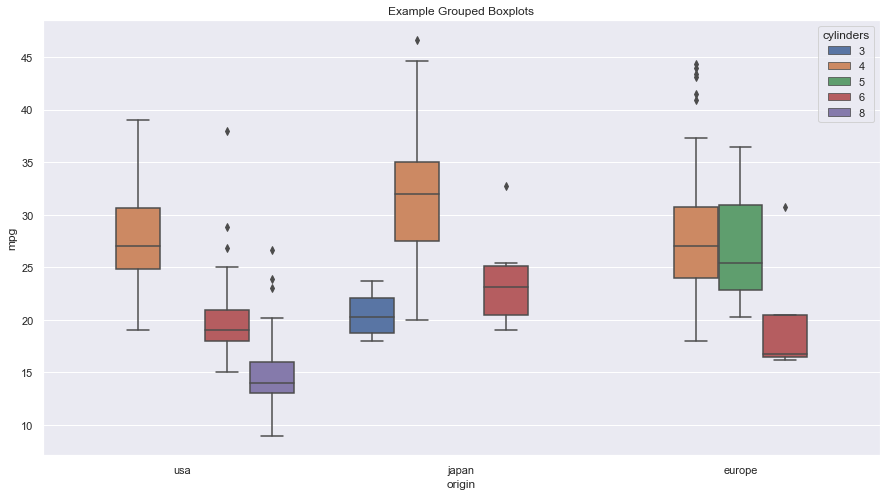

In [22]:
# Draw a nested boxplot to show bills by day and time
plt.figure(figsize=(15,8))

sns.boxplot(
    x="origin", 
    y="mpg",
    hue="cylinders",
    data=df)

plt.title("Example Grouped Boxplots");

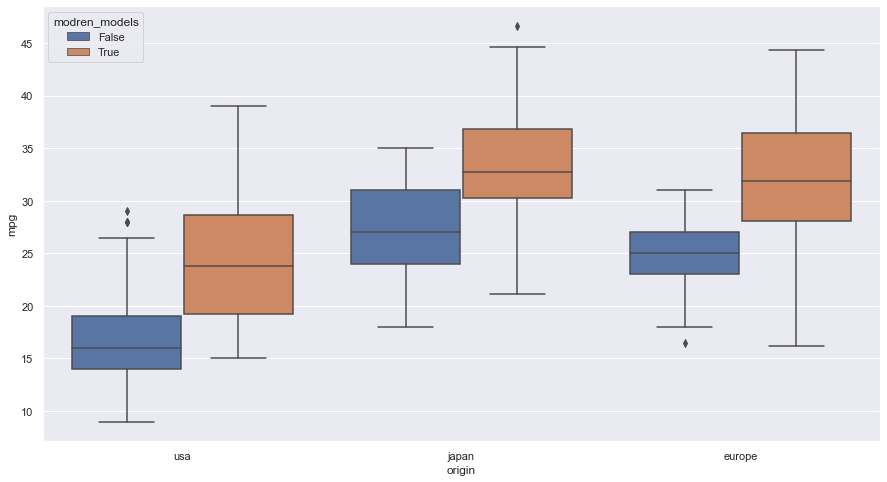

In [23]:
plt.figure(figsize=(15,8))
df['modren_models'] = df['model_year'] > 76
sns.boxplot(x="origin", y="mpg", hue='modren_models', data=df);

# Violin Plot

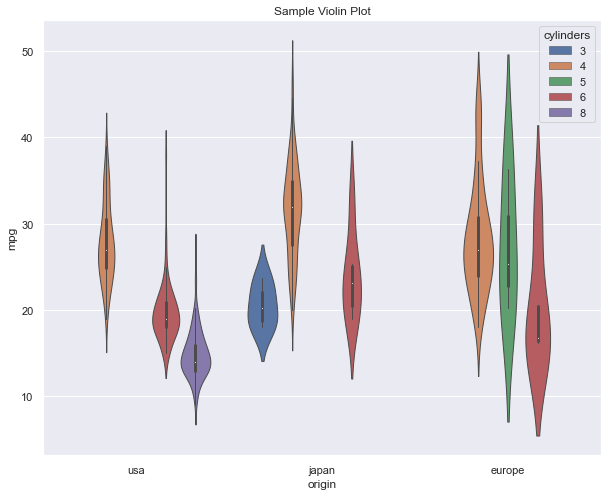

In [24]:
# Draw a nested violinplot and split the violins for easier comparison
plt.figure(figsize=(10,8))

sns.violinplot(
    data=df, 
    x="origin", 
    y="mpg", 
    hue="cylinders",
    linewidth=1
)

plt.title("Sample Violin Plot");

# Swarm Plots

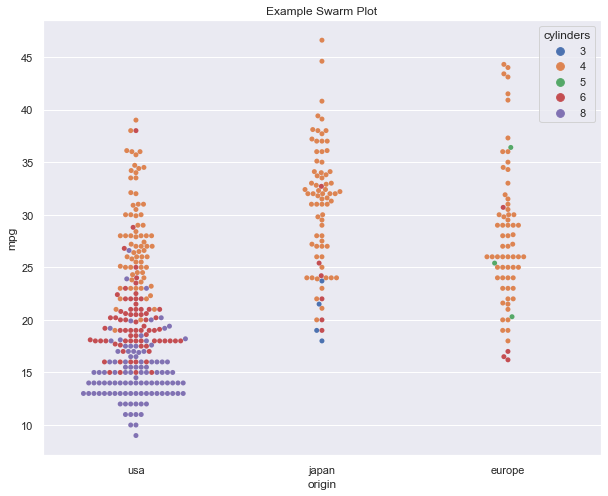

In [25]:
plt.figure(figsize=(10,8)) # it does not scale well to large numbers of observations.

sns.swarmplot(
    x="origin",
    y="mpg", 
    hue="cylinders", 
    data=df
)

plt.title("Example Swarm Plot");

# Relational Scatter Plot

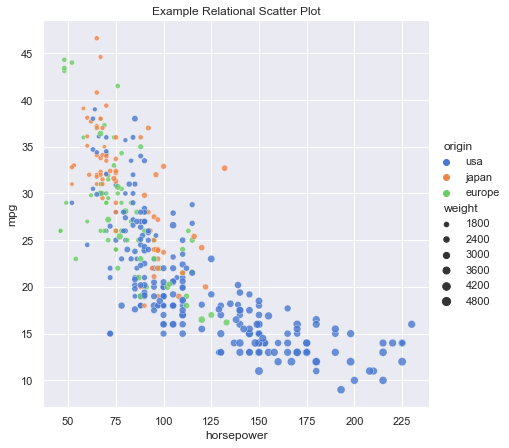

In [26]:
# Plot miles per gallon against horsepower with other semantics

sns.relplot(
    x="horsepower", 
    y="mpg", 
    hue="origin",
    size="weight",
    alpha=.8, 
    palette="muted",
    height=6, 
    data=df
)

plt.title("Example Relational Scatter Plot");